In [7]:
import pandas as pd
import numpy as np

In [8]:
def import_data(filename):
    """
    Parameters
    filename : str
        The location of csv file

    Returns:
    pandas.Dataframe :
    """
    df = pd.read_csv(filename)
    print(f"Data asli : {df.shape} - (#observasi, #kolom)")

    df = df.drop_duplicates(keep='last')
    print(f"Data setelah di-drop_duplicates : {df.shape} - (#observasi, #kolom)")

    return df

In [9]:
# Data preprocessing
# Drop output data dari dataframe, dalam kasus ini kolom "y"
def extract_input_output(data, output_column_name):
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name, axis=1)
    return input_data, output_data

In [10]:
bank_data = import_data("bank-data.csv")
x, y = extract_input_output(data=bank_data, output_column_name="y")

Data asli : (45211, 17) - (#observasi, #kolom)
Data setelah di-drop_duplicates : (45211, 17) - (#observasi, #kolom)


In [20]:
# Train test split
from sklearn.model_selection import train_test_split

# train : test. 80 : 20, 70 : 30, 90 : 10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

In [26]:
print(x_train.shape)
print(x_test.shape)

# Ratio
print(x_test.shape[0] / x.shape[0])

# Cek data kosong
print(x_train.isnull().sum() / x_train.shape[0] * 100)  

(33908, 16)
(11303, 16)
0.25000552962774547
age          7.744485
job          7.815265
marital      7.815265
education    7.496756
default      7.930282
balance      7.591129
housing      7.844756
loan         7.868350
contact      7.947977
day          7.717943
month        7.673705
duration     7.965672
campaign     7.709095
pdays        7.768078
previous     7.779875
poutcome     7.753333
dtype: float64


In [31]:
# Buat kolom numerik
numerical_columns = ["age", "balance", "campaign", "day", "duration", "pdays", "previous"]
x_train_numerical = x_train[numerical_columns]
x_train_numerical.isnull().sum()

age         2626
balance     2574
campaign    2614
day         2617
duration    2701
pdays       2634
previous    2638
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

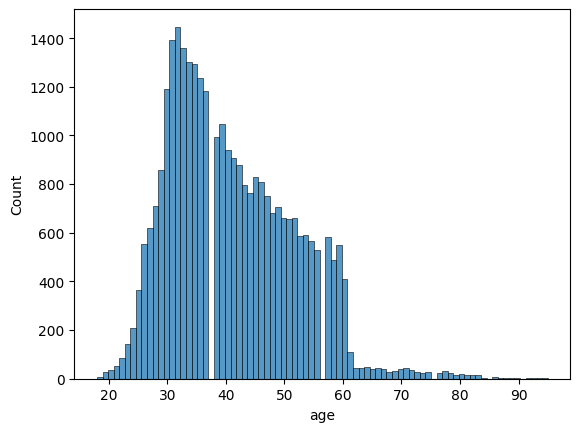

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x_train_numerical['age'])

In [45]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="median")

In [48]:
# Fit imputer
# Belajar data mana saja yang perlu di-impute
imputer.fit(x_train_numerical)

# Transform
imputed_data = imputer.transform(x_train_numerical)
x_train_numerical_imputed = pd.DataFrame(imputed_data)
x_train_numerical_imputed.columns = x_train_numerical.columns
x_train_numerical_imputed.index = x_train_numerical.index

In [49]:
x_train_numerical_imputed.isnull().any()

age         False
balance     False
campaign    False
day         False
duration    False
pdays       False
previous    False
dtype: bool

In [50]:
x_train_numerical_imputed.head()

,age,balance,campaign,day,duration,pdays,previous
37156,35.0,2749.0,1.0,13.0,127.0,-1.0,0.0
20494,30.0,443.0,2.0,12.0,80.0,-1.0,0.0
35272,39.0,4239.0,1.0,7.0,40.0,-1.0,0.0
22260,49.0,400.0,3.0,21.0,151.0,-1.0,0.0
2728,28.0,468.0,3.0,13.0,152.0,-1.0,0.0


In [55]:
# Categorical Imputation
x_train_column = list(x_train.columns)
categorical_columns = list(set(x_train_column).difference(set(numerical_columns)))
categorical_data = x_train[categorical_columns]
x_train_categorical_data = categorical_data.fillna(value="KOSONG")

x_train_categorical_data

,housing,education,loan,job,contact,default,marital,poutcome,month
37156,no,tertiary,no,management,cellular,no,single,unknown,may
20494,yes,KOSONG,KOSONG,management,cellular,no,KOSONG,unknown,KOSONG
35272,yes,tertiary,no,management,cellular,no,KOSONG,unknown,may
22260,no,KOSONG,no,services,cellular,no,KOSONG,unknown,aug
2728,yes,secondary,no,technician,unknown,no,single,unknown,may
...,...,...,...,...,...,...,...,...,...
36482,yes,tertiary,no,management,cellular,no,KOSONG,unknown,may
40177,no,tertiary,yes,management,KOSONG,no,divorced,unknown,jun
19709,no,tertiary,no,management,cellular,no,single,unknown,aug
38555,yes,secondary,no,technician,telephone,no,married,failure,may


In [61]:
# One Hot Encoding
print(pd.get_dummies(x_train_categorical_data).shape)
pd.get_dummies(x_train_categorical_data).head()

(33908, 53)


,housing_KOSONG,housing_no,housing_yes,education_KOSONG,education_primary,education_secondary,education_tertiary,education_unknown,loan_KOSONG,loan_no,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
37156,False,True,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
20494,False,False,True,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
35272,False,False,True,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
22260,False,True,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2728,False,False,True,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
